<a href="https://colab.research.google.com/github/CeciliaGaiani/LSN/blob/main/LSN_Exercises_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

## <span style="color:orange"> **Note teoriche**
### **Machine Learning**
Il **machine learning** è un campo dell'intelligenza artificiale il cui scopo è scrivere algoritmi che riconoscano, tramite l'analisi statistica, schemi e regolarità in un set di dati di input, e utilizzarli per formulare una risposta ad un certo tipo di problema. Mano a mano che l'algoritmo riceve nuovi dati è in grado di aggiornarsi automaticamente e migliorare, a partire dalle esperienze, la precisione della risposte fornite, senza essere esplicitamente ri-programmato.

Gli algoritmi di machine learning possono suddividersi in tre tipologie:

1. **Allenamento supervisionato**: il modello impara da dati etichettati. Ad ogni input è associata la corrispondente etichetta, che ne identifica opportunamente la natura. In questo modo, l'output per il dato con cui la rete è allenata risulta noto. L’obiettivo è trovare una funzione $f$ che, dato un nuovo input $x$, predica correttamente l’output $y$, cioè $f(x) \sim y$. Problemi comuni risolvibili tramite tale modello sono quelli di **classificazione**, in cui il modello assegna il dato a una categoria opportuna, e di **regressione**, in cui il modello predice un valore numerico continuo.  

2. **Allenamento non supervisionato**: si occupa di trovare schemi e strutture in dati non etichettati, ovvero dati privi di una risposta (output) nota, al fine di identificare una qualche relazione sottostante ad essi. Tra le applicazioni di tali algoritmi citiamo il **clustering**, che identifica gruppi naturali nei dati, l'**associazione**, che trova relazioni tra elementi nei dati, e i **modelli generativi**, che modellano la distribuzione dei dati per generarne di nuovi.  

3. **Allenamento di rinforzo**: è un tipo di apprendimento automatico in cui l'algoritmo impara interagendo con un ambiente. A differenza dell’apprendimento supervisionato o non supervisionato, qui l’agente non riceve direttamente etichette o gruppi di dati, ma apprende attraverso ricompense e penalità. L’agente osserva lo stato attuale dell’ambiente, esegue un’azione, riceve una ricompensa se l’azione è utile oppure una penalità se l'azione è dannosa. Tali algoritmi si basano su un modello detto **Processo Decisionale di Markov (MDP – Markov Decision Process)**, che comprende:

    - **Stati**: le situazioni in cui si trova l’agente;
    - **Azioni**: le possibili decisioni che l’agente può prendere;
    - **Transizioni**: probabilità di passare da uno stato all’altro dopo un’azione;
    - **Ricompense**: feedback positivo o negativo dato all’agente;
    - **Fattore di sconto**: dà meno peso alle ricompense future rispetto a quelle immediate.

In questo modo viene soddisfatta l'ipotesi di Markov, cioè che il futuro dipenda unicamente dallo stato e dall'azione correnti, non dalla storia passata.

Gli algoritmi di machine learning, e l'intelligenza artificiale in generale, funzionano molto bene dal punto di vista pratico, ma sono privi di un fondamento teorico rigoroso: non si comprendono a fondo le leggi che ne regolano il comportamento o che spiegano per quale motivo un algoritmo funzioni meglio degli altri.

Per costruire un algoritmo di machine learning, si utilizzano:
1. Un **dataset** $D = (X, Y)$, dove $X$ è il set delle variabili indipendenti (input) e $Y$ è il set delle variabili dipendenti (output/target);

2. Un **modello** $f(X; p)$, cioè una funzione $f: x \rightarrow y$ che dipende da un certo numero di parametri $p$. $f$ deve prevedere un’uscita $y$ dato un input $x$;

3. Una **funzione di costo** $[C[Y, f(X; p)]$, che misura quanto bene il modello $f$ si adatta ai dati.

A questo punto, il dataset $D$ viene suddiviso in due gruppi, definiti randomicamente:
- **Set di training** $D_{\text{train}}$;
- **Set di validazione (test)** $D_{\text{test}}$.

Generalmente si sceglie il 90% dei dati per il training, il 10% dei dati per la validazione.

I dati del set di training sono utilizzati per minimizzare la funzione di costo, al variare di $p$ nello spazio dei parametri possibili, mentre il datatset di validazione viene utilizzato per valutare le performance del modello.
Una volta che la funzione di costo è stata minimizzata, si definiscono **errore di training** $E_{in}$ il valore della funzione di costo per il set di training:
$$
E_{\text{in}} = C[Y_{\text{train}}, f(X_{\text{train}}; p)],
$$
e **errore di test** $E_{out}$ il valore della funzione di costo per il set di test:

$$
E_{\text{out}} = C[Y_{\text{test}}, f(X_{\text{test}}; p)].
$$

In generale, $E_{\text{out}} \geq E_{\text{in}}$ poichè i dati di test non sono utilizzati per l'ottimizzazione del modello.

Con l’aumentare del numero di dati di training, l'errore di training $E_{\text{in}}$ può aumentare leggermente se il modello è poco flessibile, perché diventa più difficile adattarsi perfettamente a tutti i dati, ma l'errore di test $E_{\text{out}}$ tende a diminuire, poiché più dati rendono il training set più rappresentativo della distribuzione reale, migliorando la generalizzazione.

Nel limite di dati infiniti, il training set rifletterebbe perfettamente la distribuzione dei dati reali e il set di validazione sarebbe perfettamente rappresentato, quindi $E_{\text{in}}$ e $E_{\text{out}}$ raggiungerebbero il medesimo valore, che prende il nome di **bias** del modello.

Siccome in generale i dati sono finiti, è possibile scomporre l’errore di test come:
$$
E_{\text{out}} = \text{Bias}^2 + \text{Varianza} + \text{Rumore}
$$

dove:

- il bias misura quanto il modello è rigido o incapace di rappresentare la vera funzione target;
- la varianza quantifica quanto il modello cambia se allenato su diversi dataset (sensibilità ai dati);
- il rumore rappresenta la componente dell’errore dovuta all’aleatorietà dei dati, non eliminabile.

La quantità $E_{out} - E_{in}$ misura quanto peggio il modello descrive i dati di test rispetto a quelli di training.

Se la differenza è piccola, il modello ha una buona capacità di generalizzare dati mai visti. Se la differenza è grande, significa che il modello si adatta troppo bene ai dati di training, imparando a rappresentarli in maniera eccellente, a tal punto da non riconoscere e generalizzare nuovi set di dati mai visti. Si parla di **overfitting**.

Inoltre, se si fissa la dimensione del dataset, la **complessità del modello** influisce sulla capacità di generalizzazione del modello.

Se un modello è troppo semplice, cioè ha pochi parametri, la sua flessibilità è limitata. Dunque, non è in grado di riconoscere la complessità del problema e rappresentare correttamente la funzione reale, indipendentemente dal numero di punti a disposizone. Dunque, sia l'errore sul training che sul test saranno elevati. La bias risulta dunque alta, mentre la varianza bassa.

Se, al contrario, un modello è troppo complesso, avendo molti parametri a disposizone, riesce ad adattarsi facilmente anche a piccole fluttuazioni dei dati di training, incluso il rumore (overfitting). Dunque, anche per piccole variazioni del training, il modello può cambiare in maniera drastica. La bias risulta quindi bassa, mentre la varianza alta. Il risultato di ciò è che il modello si comporta molto bene sul training set, riuscendo ad adattarsi ad esso perfettamente, ma male sul test set (la generalizzazione fallisce).

Per  queste ragioni, si cerca di lavorare con modelli a complessità intermedia, che riescano a riconoscere strutture e schemi nei dati, ma senza adattarsi al rumore, offrendo il miglior compromesso tra bias e varianza. In questo modo si minimizza l’errore di generalizzazione, ovvero l’errore atteso su dati nuovi mai visti, che dal punto di vista pratico, si stima come errore sul set di validazione.

---

### **Reti neurali**
Le **reti neurali feedforward** rappresentano una delle tipologie più potenti ed utilizzate di algoritmi di machine learning. A seconda dello scopo per cui vengono costruite, se ne identificano diverse tipolgie:
1. Reti neurali generiche per l’apprendimento supervisionato;
2. Reti progettate specificamente per l’elaborazione di immagini, il più noto esempio sono le Convolutional Neural Networks (CNNs);
3. Reti per dati sequenziali, come le Recurrent Neural Networks (RNNs);
4. Reti per apprendimento non supervisionato.

Le reti neurali sono costruite basandosi sull'analogia biologica con la struttura del **neurone**. Dal punto di vista del funzionamento, i neuroni sono come interruttori, che generano un segnale in uscita se ricevono abbastanza stimoli in ingresso. Questo costitusce il segnale di input per un altro neurone.
Un neurone è costituito dal corpo (**soma**), che gestisce i processi vitali della cellula, dall'**assone**, che è unico per ogni neurone e trasmette i segnali in uscita, e dai **dendriti**, multipli per ogni neurone e che ricevono segnali in ingresso.

Le connessioni tra neuroni avvengono tramite le **sinapsi**, dove neurotrasmettitori regolano l’intensità del segnale. Se lo stimolo totale ricevuto è sufficiente, il neurone genera un segnale lungo l’assone.

Il primo neurone artificiale ideato è il **perceptrone**, il quale riceve input binari $x_1, x_2, \dots$ e produce un output binario, $0$ o $1$. Ciascun input ha un'importanza definita da dei pesi $w_1, w_2, \dots$, che assegnano un'importanza diversa a ciascun input, di modo che l'output risulti $0$ o $1$ a seconda che il valore della somma pesata risulti maggiore di un'opportuno valore di soglia, cioè:

$$
  \text{output} = \begin{cases}
  1 & \text{se } \sum_j w_j x_j > \text{soglia} \\
  0 & \text{altrimenti}
  \end{cases}
$$

Il problema di questo neurone è che un piccolo cambiamento nei pesi o nella soglia può a volte causare un cambiamento drastico dell'output, variando completamente il comportamento dell'intera rete. Questo rende difficile capire come modificare gradualmente pesi e bias affinché la rete si avvicini al comportamento desiderato.

Per superare questo problema sono stati introdotti i **neuroni sigmoidi**.
Gli input $x_1, x_2, \dots$ sono binari, ma l’output non è binario, bensì definito dalla funzione continua:
$$
\sigma(z) = \frac{1}{1 + \exp(-z)} \quad \text{con } z = \textbf{w} \cdot \textbf{x} + b
$$

$\sigma$ è detta **funzione sigmoide**, $b$ è il **bias**. $\sigma$ ha il compito di definire quando il neurone si attiva, cioè produce un output. Per questo motivo prende il nome di **funzione di attivazione**.

L'allenamento di una rete neurale si può schematizzare come segue:
- si mostrano tanti esempi di dati di training (input + output desiderato) alla rete;
- si confronta l’output della rete con quello corretto;
- si calcola l’errore (funzione di perdita). In base allo scopo della rete, è possibile usare diverse funzioni di costo. In generale:
    - per dati continui si usa l'**errore quadratico medio (MSE)**:
      $
      E(w) = \frac{1}{n} \sum_{i=1}^n (Y_i - f(Y_i; w))^2
      $

    - per dati categorici (classificazione) si usa la **Cross-Entropy**:
      $
      E(w) = - \sum_{i=1}^n [Y_i \log(f(Y_i; w)) + (1 - Y_i) \log(1 - f(Y_i; w))]
      $

- si correggono i pesi e i bias per ridurre l'errore;
- si ripete il processo per molti dati (epoche).

Per fare ciò, si usa l'algoritmo di **gradient descent** (generalmente SGD), che aggiorna i parametri (pesi e bias) nella direzione in cui l’errore diminuisce di più, calcolando la derivata della funzione di errore rispetto a ciascun peso. Il calcolo dei gradienti viene fatto tramite un algoritmo specifico che prende il nome di **backpropagation**. Per poter calcolare queste derivate, tutte le funzioni nella rete devono essere derivabili. Se la funzione di attivazione scelta non è continua e liscia, possono verificarsi comportamenti indesiderati, e l'apprendimento risulta instabile o impossibile. Ad esempio, nel caso del perceptrone, la funzione di attivazione è una funzione a gradino, discontinua e con derivata nulla ovunque tranne in un punto dove non è definita. Per questo la correzione di pesi e bias risulta problematica.
La "bontà" della funzione di attivazione fa sì che piccole variazioni nei pesi o nel bias producano una variazione finita e quantificabile nell'output, in modo da garantire un apprendimento progressivo e stabile.

Le reti neurali sono costruite a strati:

- Lo **strato di input**, che  contiene i neuroni che ricevono direttamente i dati in input;
- Lo **strato di output**, che produce la predizione (può essere un singolo neurone o più, a seconda del compito assegnato alla rete);
- Gli **strati nascosti** sono chiamati **hidden layers** e svolgono trasformazioni più complesse per estrarre pattern dai dati di input.

I layer di una rete son definiti **densi** se presentano neuroni che sono conessi a tutti i neuroni del layer precedente.
In una rete **feedforward** le informazioni scorrono in avanti (input-hidden-output). L’architettura dei layer di input/output si decide in base al tipo di dati e di target nel dataset $D = (X,Y)$. Il layer di input avrà un numero di neuroni pari al numero di caratteristiche degli esempi di input. Il layer di output avrà un numero di neuroni pari al numero di variabili da predire (output).
Se un layer riceve un input di lunghezza $n_{in}$ e ha $n_{out}$ neuroni, allora il numero di parametri della rete per quel layer è:

$$
parametri = n_{in} \cdot n_{out}  + n_{out}
$$

dove si tiene conto del fatto che ogni neurone in uscita ha un peso per ogni input ($n_{in} \cdot n_{out}$), e del fatto che ogni neurone in uscita presenta un bias ($n_{out}$).

L’uso dei hidden layers amplia enormemente la capacità rappresentativa di una rete neurale. Il risultato più formale di questa capacità è il **Teorema di Approssimazione Universale**: una rete neurale con un singolo hidden layer può approssimare qualsiasi funzione continua a più input e output con precisione arbitraria. Pur essendo approssimatori universali, la larghezza del layer nascosto delle rete potrebbe dover essere esponenzialmente grande.

L’idea chiave è che i neuroni nascosti possono generare funzioni a gradino (funzioni caratteristiche) con altezza e posizione arbitraria. Sommandole, si può **approssimare qualsiasi funzione continua**.

Si consideri una rete neurale composta da un solo strato nascosto, due neuroni nascosti e un neurone di output. Ogni neurone nascosto applica una funzione sigmoide della forma:

$$
\sigma(wx + b) = \frac{1}{1 + e^{-wx - b}}
$$

Variando il peso ($w$) e il bias ($b$), è possibile modificare la forma della curva. Se il peso è molto grande, la sigmoide si avvicina a una funzione a gradino; il bias ne controlla la posizione lungo l’asse $x$.

Utilizzando due neuroni nascosti con gradini in posizioni diverse e pesi in uscita opposti, è possibile ottenere un “**bump**”, cioè un picco localizzato. Sommando il contributi di molti bump di questo tipo, distribuiti lungo l’intervallo $[0,1]$, è possibile costruire un’approssimazione arbitraria della funzione desiderata, che diventa via via più precisa aumentando il numero di neuroni nel layer nascosto.

Questo stesso approccio si estende naturalmente anche a funzioni con più variabili. Per esempio, nel caso di due input $(x, y)$, è possibile sommare il contributo di gradini in $x$ e $y$, in modo da ottenere **bump in 2D**, che formano delle “**torri**” in uno spazio tridimensionale. Sommando il contributo di torri con posizioni, altezze e larghezze differenti è possibile costruire funzioni più complesse.

Con questo meccanismo, è possibile approssimare qualsiasi funzione continua su uno spazio bidimensionale. Generalizzando il metodo, è possibile estenderlo a funzioni in spazi con molte più dimensioni.

Le reti neurali moderne usano più hidden layers, motivo per cui si parla di **“Deep” Neural Networks (DNN)**.
Aumentare il numero di layer, cresce il numero di parametri del modello, e dunque il potere di rappresentazione della rete. Il numero di parametri deve essere abbastanza grande da evitare l’underfitting, non troppo grande per evitare l’overfitting.


Durante l’allenamento di una rete neurale profonda (DNN), l’algoritmo cerca di **minimizzare l’errore sul training set** $E_{in}$ attraverso l’ottimizzazione dei pesi. Con il passare delle epoche, la rete impara gradualmente a rappresentare la funzione che associa input a output.
Con l’aumentare delle epoche, la rete può **imparare troppo bene i dati di addestramento**, inclusi eventuali rumori o anomalie. Questo porta ad overfitting.

Per evitare l'overfitting si usano delle **tecniche di regolarizzazione**. Si controlla la complessità del modello introducendo delle penalizzazioni ai pesi della funzione di costo, in modo da favorire modelli più semplici e stabili. Tra queste figurano la **cross validation** e l'**early stopping**: durante l’allenamento si calcola l’errore di validazione $E_{out}$ a ogni epoca. Inizialmente, sia $E_{in}$ che $E_{out}$ diminuiscono. Dopo un certo punto, $E_{in}$ continua a scendere, ma $E_{out}$ inizia a salire, cioè la rete sta iniziando a sovra-adattarsi ai dati. Dunque, quando $E_{out}$ raggiunge il minimo, si ferma l’allenamento.

---

### Overview

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data.

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [442]:
# Parametri della retta f(x) = mx + b
m = 2 # Coefficiente angolare
b = 1 # Intercetta

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [443]:
import numpy as np

# Si generano i dati di input e i dati di validazione (rispettivamente 1000 e 100 valori uniformemente distribuiti tra -1 e 1)
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort() # Si riordinano i dati di validazione, in modo da plottare la funzione in maniera ordinata
y_target = m * x_valid + b # I valori y_target rappresentano i valori teorici della funzione lineare

# Aggiungiamo una componente di non idealità: è come se si stesse realizzando un esperimento dove si osserva una relazione lineare
# (y = mx + b), ma ogni misura presentasse una certa incertezza
sigma = 0.4
# Si generano y_train e y_valid come valore casuali estratti da una distribuzione normale centrata su x_train/x_valid e con deviazione sigma
y_train = np.random.normal(m * x_train + b, sigma)
y_valid = np.random.normal(m * x_valid + b, sigma)

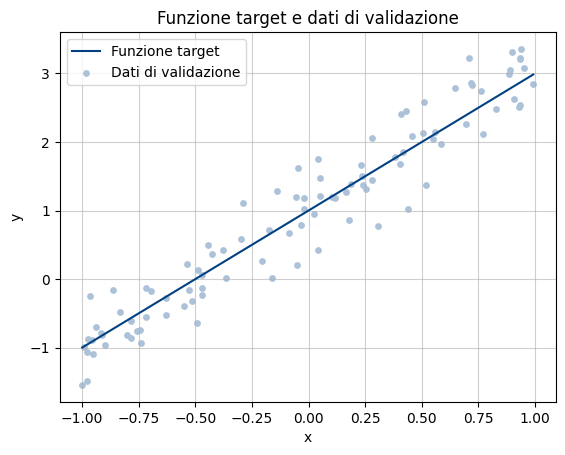

In [444]:
# Si rappresentano il set di dati target (ideali) e il set di dati di validazione (con rumore)
import matplotlib.pyplot as plt
plt.title('Funzione target e dati di validazione')
plt.plot(x_valid, y_target, label='Funzione target', color='xkcd:darkish blue')
plt.scatter(x_valid, y_valid, label='Dati di validazione', color='xkcd:cloudy blue', marker='o', s=15)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.6)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [445]:
# Si costruisce una rete neurale semplice (sequential), con layer completamente connessi (dense)
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# Si crea una rete con un solo neurone ed un unico input (l'ascissa): è sufficente perchè la rete allena peso e bias, legati all'input dalla relazione w*x + b (due esattamente come i parametri che si vuole individuare)
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# Si specifica come addestare la rete:
# - optimizer='sgd' usa la stochastic gradient descent per aggiornare i pesi
# - loss='mse': usa l'errore quadratico medio come funzione d'errore
# - metrics=['mse']: la MSE viene usata anche come metrica da monitorare durante l'allenamento (utile salvarla per fare i plot delle funzioni loss successivamente)

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [446]:
# Sommario del modello ottenuto: si hanno solo due parametri (peso e bias) in quanto la rete ha un solo input
model.summary()

Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_182 (Dense)               │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [447]:
# Il codice esegue l'addestramento del modello neurale usando i dati di training x_train e y_train.
# L'addestramento è effettuato in batch di 32 esempi per volta (batch_size=32), e ripetuto per 70 epoche, ovvero 70 iterazioni sull'intero set di dati.
# A ogni epoca, i dati di input vengono mescolati casualmente (shuffle=True) per migliorare la capacità di generalizzazione del modello e ridurre il rischio di overfitting locale.
# Durante il training, viene anche monitorato l’errore del modello su un set di validazione (validation_data=(x_valid, y_valid)), che contiene dati mai visti dal modello fino a quel momento. Il modello non si allena sui dati di validazione, li usa solo per valutare come sta andando.
# Questo permette di valutare la capacità del modello di generalizzare oltre i dati su cui è stato addestrato.
# Infine, i risultati dell’addestramento, come l’errore quadratico medio (MSE) su training e validazione per ogni epoca, vengono salvati all’interno dell’oggetto history. Questo oggetto può essere utilizzato per visualizzare l’andamento dell’errore nel tempo e diagnosticare fenomeni come overfitting o underfitting.
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=70,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.7666 - mse: 2.7666 - val_loss: 2.0820 - val_mse: 2.0820
Epoch 2/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5769 - mse: 1.5769 - val_loss: 1.3357 - val_mse: 1.3357
Epoch 3/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0197 - mse: 1.0197 - val_loss: 0.9085 - val_mse: 0.9085
Epoch 4/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7771 - mse: 0.7771 - val_loss: 0.6451 - val_mse: 0.6451
Epoch 5/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4982 - mse: 0.4982 - val_loss: 0.4748 - val_mse: 0.4748
Epoch 6/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3988 - mse: 0.3988 - val_loss: 0.3602 - val_mse: 0.3602
Epoch 7/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2904 - mse: 0.2904 - val_loss: 0.2874 - val_mse: 0.2874
Epoch 8/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2430 - mse: 0.2430 - val_loss: 0.2379 - val_mse: 0.2379
Epoch 9/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2161 - mse:

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [448]:
# Si stampano peso e bias ottenuti dall'allenamento
model.get_weights()

[array([[2.0021741]], dtype=float32), array([1.0096565], dtype=float32)]

In [449]:
# Qui si valuta il modello su dati che non ha mai visto durante l’allenamento: serve a misurare la performance finale, senza influenzare il modello.
# Non si aggiornano i pesi, si calcolano solo loss e metriche.
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1207 - mse: 0.1207

Test loss: 0.1313684582710266
Test accuracy: 0.1313684582710266


In [450]:
# Il modello è valutato anche sui dati target
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.3851e-05 - mse: 8.3851e-05

Test loss: 9.344272257294506e-05
Test accuracy: 9.344272257294506e-05


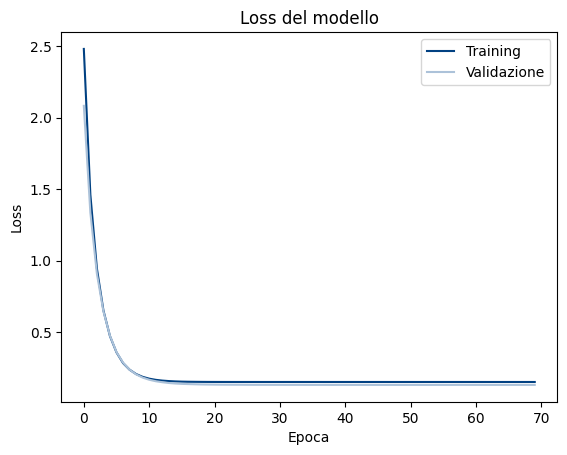

In [451]:
# Si rappresentano i valori della loss per i dati di training e di validazione
plt.plot(history.history['loss'], color='xkcd:darkish blue') # Lista che contiene i valori della loss calcolati sul dataset di training ad ogni epoca
plt.plot(history.history['val_loss'], color='xkcd:cloudy blue') # Lista che contiene i valori della loss calcolati sul dataset di validazione ad ogni epoca
plt.title('Loss del modello')
plt.ylabel('Loss')
plt.xlabel('Epoca')
plt.legend(['Training', 'Validazione'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


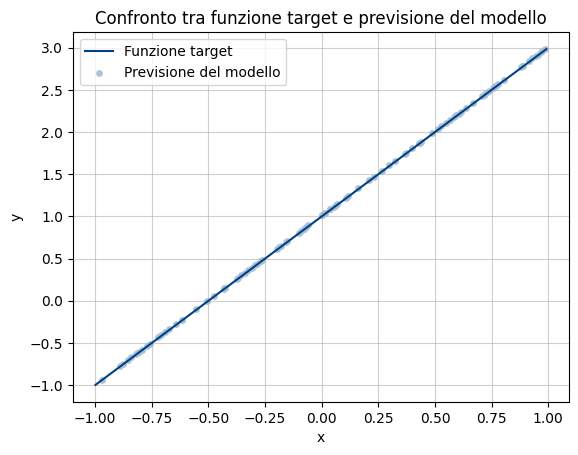

In [452]:
# Si usa un set di dati per verificare se i parametri previsti dal modello restituiscano risultati vicini a quelli attesi
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.title('Confronto tra funzione target e previsione del modello')
plt.plot(x_valid, y_target, label='Funzione target', color='xkcd:darkish blue')
plt.scatter(x_predicted, y_predicted, label='Previsione del modello',color='xkcd:cloudy blue',  marker='o', s=15)
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True, alpha=0.6)
plt.legend()
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### *Esercizio 11.1 - Soluzione proposta*
Per lo svolgimento di questo esercizio, è stato utilizzato il codice fornito per allenare una rete neurale, al variare del parametro di noise $\sigma$, nel numero di dati di training $N_{train}$ e del numero di epoche $N_{epochs}$. Si riporta, a titolo d'esempio, l'allenamento realizzato con parametri:
- $\sigma = 0.4$
- $N_{train} = 1000$
- $N_{epochs} = 70$

Come set di validazione sono stati utilizzati $N_{val}=100$ dati.

La  rete è organizzata con un solo neurone ed un unico input (l'ascissa), senza funzione di attivazione. É sufficente perchè la rete allena peso e bias (legati all'input dalla relazione $w \cdot x + b$), che sono in numero pari ai parametri da individuare. Si utilizzano la Stochastic Gradient Descent per aggiornare i pesi e la Mean Square Error come funzione d'errore.

Nelle diverse prove, si è osservato che:

1. Un aumento di $\sigma$ comporta una maggiore dispersione dei dati di training e validazione intorno alla retta reale. Se il rumore risulta troppo elevato, i dati usati dalla rete saranno meno rappresentativi della funzione target, e sarà difficile individuare una relazione coerente tra input e output. Di conseguenza, la qualità delle previsioni peggiora, sia perché l’allenamento è meno efficace, sia perché il modello fatica a generalizzare su dati nuovi. Si noti che comunque l'introduzione di rumore è utile al fine di rendere i dati di training più realistici e vari, prevenendo l'overfitting e migliorando la capacità predittiva del modello.

2. All’aumentare del numero di epoche $N_{epochs}$ di addestramento, il modello ha più opportunità per adattarsi ai dati di training. Questo porta a un miglioramento della funzione di loss, in particolare sui dati di training, poiché il modello ottimizza i propri pesi per ridurre l’errore su quei dati specifici.
Tuttavia, la funzione di loss sui dati di validazione tende a migliorare meno rispetto a quella di training. Questo accade perché il modello non è direttamente ottimizzato sui dati di validazione: essi vengono utilizzati solo per valutare la capacità del modello di generalizzare a dati mai visti.
Si noti che con l’aumento delle epoche, il modello potrebbe iniziare a sovradattarsi ai dati di training, memorizzando dettagli specifici e rumore presenti in essi (overfitting).

3. All'aumentare del numero di dati di training $N_{train}$, il modello migliora in maniera significativa e la funzione di loss migliora sia sul training che sul test. In particolare, si osserva che la funzione di loss per il dataset di validazione risulta inferiore a quella del dataset di training: questo indica che il modello è riuscito a generalizzare bene, grazie alla maggiore varietà e rappresentatività dei dati usati per l’addestramento.



### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set?
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

### *Esercizio 11.2 - Soluzione proposta*
Per lo svolgimento di questo esercizio è stata seguita la struttura del codice utilizzato per la risoluzione dell'Esercizio 11.1. I dati sono stati estratti utilizzando i seguenti parametri:

- $\sigma = 0.4$
- $N_{train} = 2500$

Di seguito si riportano i plot della funzione target $f(x)=4-3x-2x^2+3x^3$ e del set di dati di validazione, con rumore, costituito da $N_{val} = 250$ dati.

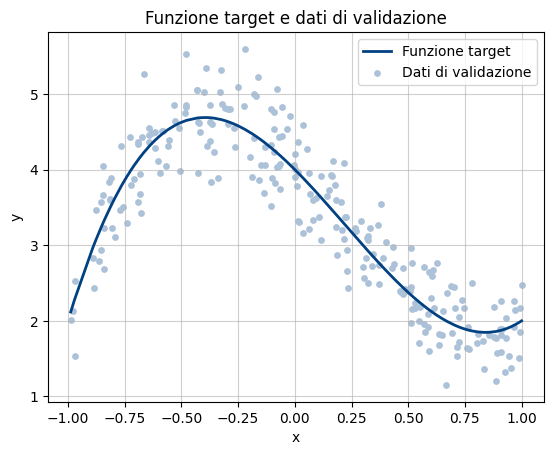

In [453]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri di taget della funzione f(x) = ax³ + bx² + cx + d
a = 3
b = -2
c = -3
d = 4

np.random.seed(0)

x_train = np.random.uniform(-1, 1, 2500)
x_valid = np.random.uniform(-1, 1, 250)
x_valid.sort()

sigma = 0.4 # Noise

y_target = a * x_valid**3 + b * x_valid**2 + c * x_valid + d # Funzione polinomiale target (ideale)
y_train = np.random.normal(a * x_train**3 + b * x_train**2 + c * x_train + d, sigma) # Dati di training con noise
y_valid = np.random.normal(y_target, sigma) # Dati di validazione con noise

# Plot della funzione target e dei dati di validazione
plt.title('Funzione target e dati di validazione')
plt.plot(x_valid, y_target, color='xkcd:darkish blue', linewidth=2, label='Funzione target')
plt.scatter(x_valid, y_valid, color='xkcd:cloudy blue', label='Dati di validazione', marker='o', s=15)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, alpha=0.6)
plt.legend()
plt.show()


Al fine di analizzare l'influenza del numero di layer e di neuroni sull'accuratezza delle previsioni, sono state costruite tre diverse reti neurali feedforward, tutte caratterizzate da fully connected layers:

- Prima versione: composta da un singolo layer nascosto con 10 neuroni, seguito da un layer di output con 1 solo neurone per la combinazione finale dei risultati. Il numero totale di parametri è pari a 31.

- Seconda versione: presenta un layer di input con 10 neuroni, un hidden layer con 5 neuroni e un neurone di output. In questo caso, la complessità del modello aumenta, così come il numero di interconnessioni, per un totale di 81 parametri.

- Terza verisone: formata da un layer iniziale con 10 neuroni, seguito da due hidden layer, rispettivamente con 20 e 5 neuroni, e un layer di output singolo. Questa configurazione incrementa ulteriormente la complessità della rete, per un totale di 351 parametri.

In tutte le versioni si utilizza lo Stochastic Gradient Descent come algoritmo di ottimizzazione e la Mean Squared Error come funzione di perdita. L'addestramento è eseguito per $N_{epochs}=80$ epoche.

### **=========================** Prima versione **=========================**

In [454]:
# Costruzione della rete neurale: input layer costituito da 10 neuroni + 1 neurone di output
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,),activation="relu"))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

# Training della rete
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=80,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_183 (Dense)               │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_184 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.3471 - mse: 6.3471 - val_loss: 0.6378 - val_mse: 0.6378
Epoch 2/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6730 - mse: 0.6730 - val_loss: 0.5312 - val_mse: 0.5312
Epoch 3/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6143 - mse: 0.6143 - val_loss: 0.5289 - val_mse: 0.5289
Epoch 4/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5467 - mse: 0.5467 - val_loss: 0.4445 - val_mse: 0.4445
Epoch 5/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5074 - mse: 0.5074 - val_loss: 0.3987 - val_mse: 0.3987
Epoch 6/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4697 - mse: 0.4697 - val_loss: 0.3695 - val_mse: 0.3695
Epoch 7/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3979 - mse: 0.3979 - val_loss: 0.3422 - val_mse: 0.3422
Epoch 8/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3606 - mse: 0.3606 - val_loss: 0.3151 - val_mse: 0.3151
Epoch 9/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3511 - mse: 

In [455]:
model.get_weights()

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1811 - mse: 0.1811 

Test loss: 0.17183522880077362
Test accuracy: 0.17183522880077362


In [456]:
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0147 - mse: 0.0147 

Test loss: 0.02344173565506935
Test accuracy: 0.02344173565506935


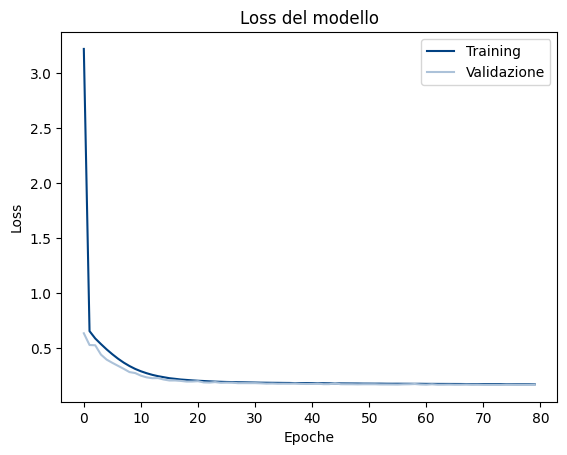

In [457]:
# Valori della loss per i dati di training e di validazione
plt.plot(history.history['loss'], color='xkcd:darkish blue')
plt.plot(history.history['val_loss'], color='xkcd:cloudy blue')
plt.title('Loss del modello')
plt.ylabel('Loss')
plt.xlabel('Epoche')
plt.legend(['Training', 'Validazione'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


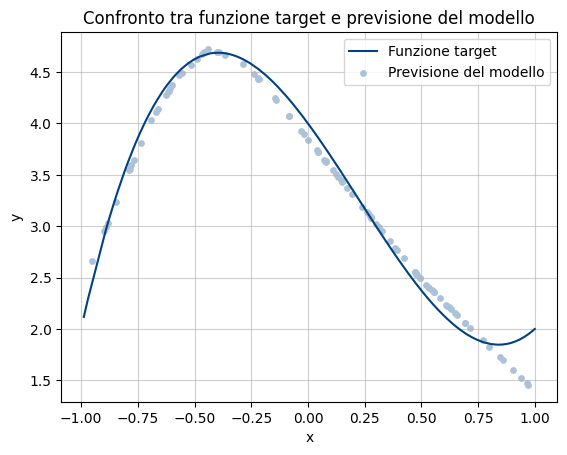

In [458]:
# Set di dati per verificare le previsioni del modello
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.title('Confronto tra funzione target e previsione del modello')
plt.plot(x_valid, y_target, label='Funzione target', color='xkcd:darkish blue')
plt.scatter(x_predicted, y_predicted, label='Previsione del modello',color='xkcd:cloudy blue', marker='o', s=15)
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True, alpha=0.6)
plt.legend()
plt.show()


La rete costruita presenta una complessità piuttosto limitata, e di conseguenza il modello non riesce a rappresentare in modo particolarmente esaustivo la funzione target, in particolare la regione di decrescita e il minimo, che non viene nemmeno riconosciuto.

### **=========================** Seconda versione **=========================**

In [459]:
# Costruzione della rete neurale: input layer costituito da 10 neuroni + hidden layer di 5 neuroni + 1 neurone di output
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,),activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

# Training della rete
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=80,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_185 (Dense)               │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_186 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_187 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.2087 - mse: 5.2087 - val_loss: 0.6292 - val_mse: 0.6292
Epoch 2/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6711 - mse: 0.6711 - val_loss: 0.5801 - val_mse: 0.5801
Epoch 3/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6439 - mse: 0.6439 - val_loss: 0.4997 - val_mse: 0.4997
Epoch 4/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5665 - mse: 0.5665 - val_loss: 0.4140 - val_mse: 0.4140
Epoch 5/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4635 - mse: 0.4635 - val_loss: 0.3551 - val_mse: 0.3551
Epoch 6/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3864 - mse: 0.3864 - val_loss: 0.3139 - val_mse: 0.3139
Epoch 7/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3311 - mse: 0.3311 - val_loss: 0.2615 - val_mse: 0.2615
Epoch 8/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2866 - mse: 0.2866 - val_loss: 0.3111 - val_mse: 0.3111
Epoch 9/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2608 - mse: 

In [460]:
model.get_weights()

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1741 - mse: 0.1741 

Test loss: 0.16238903999328613
Test accuracy: 0.16238903999328613


In [461]:
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mse: 0.0066 

Test loss: 0.01197356078773737
Test accuracy: 0.01197356078773737


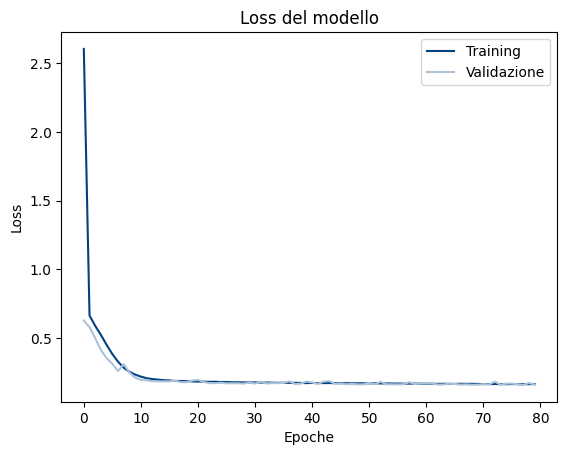

In [462]:
# Valori della loss per i dati di training e di validazione
plt.plot(history.history['loss'], color='xkcd:darkish blue')
plt.plot(history.history['val_loss'], color='xkcd:cloudy blue')
plt.title('Loss del modello')
plt.ylabel('Loss')
plt.xlabel('Epoche')
plt.legend(['Training', 'Validazione'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


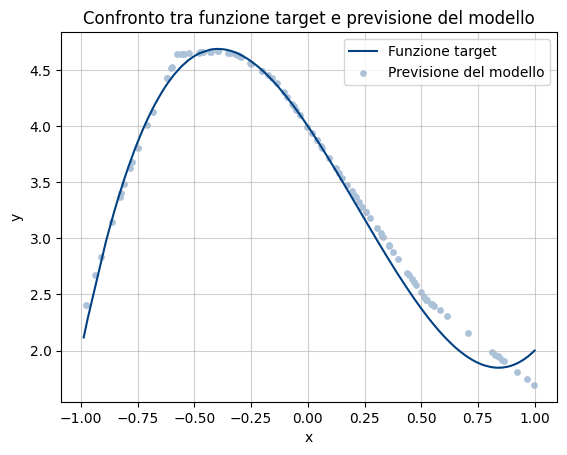

In [463]:
# Set di dati per verificare le previsioni del modello
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.title('Confronto tra funzione target e previsione del modello')
plt.plot(x_valid, y_target, label='Funzione target', color='xkcd:darkish blue')
plt.scatter(x_predicted, y_predicted, label='Previsione del modello',color='xkcd:cloudy blue',  marker='o', s=15)
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True, alpha=0.6)
plt.legend()
plt.show()


Con l'aggiunta di un hidden layer la complessità del modello aumenta, permettendogli di adattarsi meglio ai dati di validazione. In particolare, si osserva un leggero miglioramento nella capacità di approssimare la regione di decrescita.

### **=========================** Terza versione **=========================**

In [464]:
# Costruzione della rete neurale: input layer costituito da 10 neuroni + hidden layer di 20 neuroni + hidden layer di 5 neuroni + 1 neurone di output
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,),activation="relu"))
model.add(Dense(20, input_shape=(1,),activation="relu"))
model.add(Dense(5, input_shape=(1,),activation="relu"))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

# Training della rete
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=80,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Model: "sequential_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_188 (Dense)               │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_189 (Dense)               │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_190 (Dense)               │ (None, 5)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_191 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 351 (1.37 KB)

 Trainable params: 351 (1.37 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8373 - mse: 3.8373 - val_loss: 0.4677 - val_mse: 0.4677
Epoch 2/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5154 - mse: 0.5154 - val_loss: 0.3454 - val_mse: 0.3454
Epoch 3/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3987 - mse: 0.3987 - val_loss: 0.3213 - val_mse: 0.3213
Epoch 4/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3143 - mse: 0.3143 - val_loss: 0.2398 - val_mse: 0.2398
Epoch 5/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2544 - mse: 0.2544 - val_loss: 0.2012 - val_mse: 0.2012
Epoch 6/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2210 - mse: 0.2210 - val_loss: 0.1912 - val_mse: 0.1912
Epoch 7/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1979 - mse: 0.1979 - val_loss: 0.1885 - val_mse: 0.1885
Epoch 8/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1821 - mse: 0.1821 - val_loss: 0.1830 - val_mse: 0.1830
Epoch 9/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1819 - mse: 

In [465]:
model.get_weights()

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1687 - mse: 0.1687 

Test loss: 0.15460170805454254
Test accuracy: 0.15460170805454254


In [466]:
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0023 - mse: 0.0023 

Test loss: 0.0018828156171366572
Test accuracy: 0.0018828156171366572


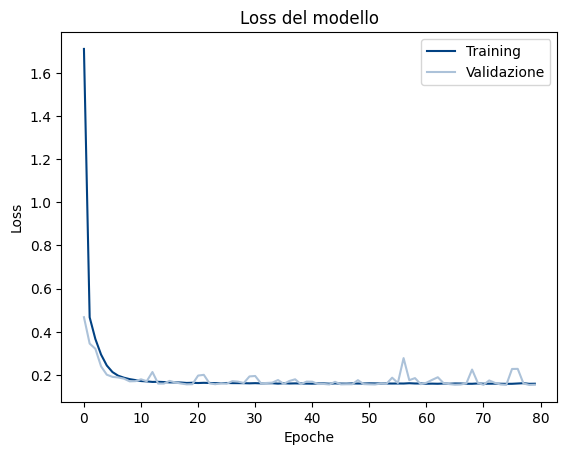

In [467]:
# Valori della loss per i dati di training e di validazione
plt.plot(history.history['loss'], color='xkcd:darkish blue')
plt.plot(history.history['val_loss'], color='xkcd:cloudy blue')
plt.title('Loss del modello')
plt.ylabel('Loss')
plt.xlabel('Epoche')
plt.legend(['Training', 'Validazione'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


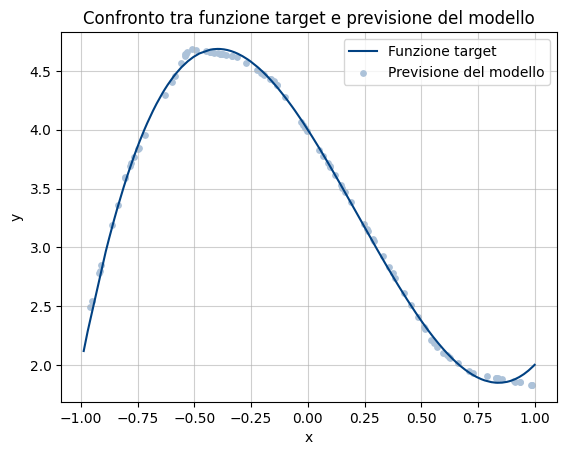

In [468]:
# Set di dati per verificare le previsioni del modello
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.title('Confronto tra funzione target e previsione del modello')
plt.plot(x_valid, y_target, label='Funzione target', color='xkcd:darkish blue')
plt.scatter(x_predicted, y_predicted, label='Previsione del modello',color='xkcd:cloudy blue',  marker='o', s=15)
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True, alpha=0.6)
plt.legend()
plt.show()


La rete costruita presenta un elevato livello di complessità, che consente al modello di descrivere in maniera più efficace i dati di prova, riproducendo in maniera adeguata la curvatura della funzione anche nella regione del minimo.

Dunque, si può concludere che, all’aumentare della complessità della rete (cioè, del numero di neuroni, dei layer e dei parametri da ottimizzare) la capacità predittiva del modello migliora.



### **Capacità predittiva fuori dal range di addestramento**
La rete è stata allenata per apprendere la corrispondenza tra input e output solo per $x \in [−1,1]$, e fornire una buona previsione di output per input compresi nel range visto durante il training.

Di conseguenza, ci si aspetta che la rete non sia in grado di generalizzare correttamente al di fuori di tale intervallo: non ha mai allenato dati relative a quelle regioni, e quindi non ha appreso un comportamento da replicare. Ciò si osserva nel plot sottostante, in cui si nota una perdita di coerenza tra target e previsione uscendo da $[-1,1]$.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


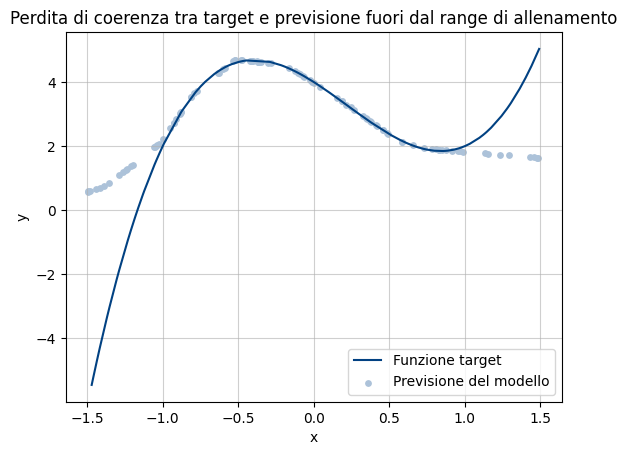

In [469]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
x_valid=np.random.uniform(-1.5,1.5,100)
x_valid.sort()
y_target=a * x_valid**3 + b * x_valid**2 + c * x_valid + d
y_predicted = model.predict(x_predicted)
plt.title('Perdita di coerenza tra target e previsione fuori dal range di allenamento')
plt.plot(x_valid, y_target, color='xkcd:darkish blue', label='Funzione target')
plt.scatter(x_predicted, y_predicted, color='xkcd:cloudy blue', label='Previsione del modello',  marker='o', s=15)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.grid(True, alpha=0.6)
plt.show()

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

### *Esercizio 11.3 - Soluzione proposta*
Per lo svolgimento di questo esercizio è stato seguito lo schema degli Esercizi 11.1 e 11.2.

Sono stati utilizzati $N_{train}=5000$ dati di allenamento, con rumore gaussiano $\sigma = 0.2$. Il set di validazione è costituito da $N_{val}=500$ dati.


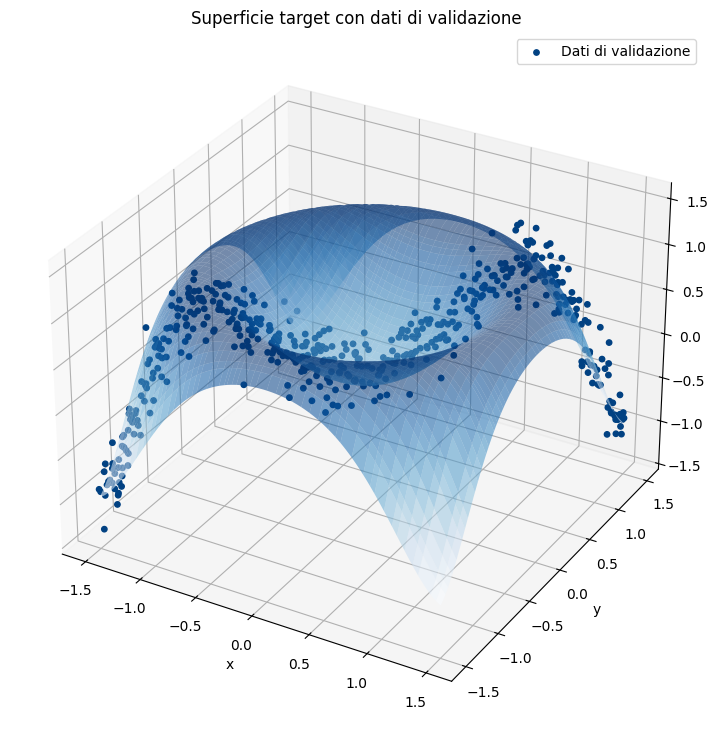

In [470]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

np.random.seed(0)

# Dati x, y di training
x_train = np.random.uniform(-3/2, 3/2, 5000)
y_train = np.random.uniform(-3/2, 3/2, 5000)

# Dati x, y di validazione
x_valid = np.random.uniform(-3/2, 3/2, 500)
x_valid.sort()

y_valid = np.random.uniform(-3/2, 3/2, 500)
y_valid.sort()

# Funzione target (ideale, senza noise)
z_target=np.sin(x_valid**2+y_valid**2)

sigma = 0.2 # Noise
z_train = np.random.normal(np.sin(x_train**2+y_train**2), sigma) # z di training (con noise)
z_valid = np.random.normal(np.sin(x_valid**2+y_valid**2), sigma) # z di validazione (con noise)

# Creazione plot 3D: superficie target + dati di validazione
fig = plt.figure(figsize=(11, 9))
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(x_valid, y_valid)
z = np.sin(x**2 + y**2)

# Superficie della funzione target
ax.plot_surface(x, y, z, cmap='Blues', alpha = 0.55)

# Dati di validazione
ax.scatter(x_valid, y_valid, z_valid, c='xkcd:darkish blue', marker='o', label='Dati di validazione', alpha=1, s=15)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Superficie target con dati di validazione')
ax.legend()

plt.show()

È stata costruita una rete neurale composta da:
- un layer di input con 32 neuroni, ciascuno dei quali riceve in input un vettore bidimensionale $(x_1, x_2)$, corrispondente alle due variabili indipendenti della funzione $f(x, y)$;
- due hidden layer, rispettivamente con 16 e 7 neuroni;
- un layer di output con un singolo neurone, incaricato di restituire la previsione finale.

Per l’addestramento del modello sono stati adottati:

- ReLU come funzione di attivazione;
- Stochastic Gradient Descent come algoritmo di ottimizzazione;
- Mean Squared Error come funzione di loss.

La rete è stata allenata per $N_{epochs}=150$ epoche.

In [471]:
# Costruzione della rete neurale
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(32, input_shape=(2,),activation="relu"))
model.add(Dense(16, input_shape=(1,),activation="relu"))
model.add(Dense(7, input_shape=(1,),activation="relu"))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=np.column_stack((x_train, y_train)),
                    y=z_train,
                    batch_size=32,
                    epochs=150,
                    shuffle=True,
                    validation_data=(np.column_stack((x_valid, y_valid)), z_valid))

Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_192 (Dense)               │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_193 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_194 (Dense)               │ (None, 7)              │           119 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_195 (Dense)               │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 751 (2.93 KB)

 Trainable params: 751 (2.93 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3391 - mse: 0.3391 - val_loss: 0.3239 - val_mse: 0.3239
Epoch 2/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1597 - mse: 0.1597 - val_loss: 0.3173 - val_mse: 0.3173
Epoch 3/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1538 - mse: 0.1538 - val_loss: 0.2994 - val_mse: 0.2994
Epoch 4/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1531 - mse: 0.1531 - val_loss: 0.2912 - val_mse: 0.2912
Epoch 5/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1450 - mse: 0.1450 - val_loss: 0.2806 - val_mse: 0.2806
Epoch 6/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1384 - mse: 0.1384 - val_loss: 0.2713 - val_mse: 0.2713
Epoch 7/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1359 - mse: 0.1359 - val_loss: 0.2509 - val_mse: 0.2509
Epoch 8/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1273 - mse: 0.1273 - val_loss: 0.2340 - val_mse: 0.2340
Epoch 9/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [472]:
model.get_weights()

score = model.evaluate(np.column_stack((x_valid, y_valid)), z_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0429 - mse: 0.0429 

Test loss: 0.04309378191828728
Test accuracy: 0.04309378191828728


In [473]:
score = model.evaluate(np.column_stack((x_valid, y_valid)), z_target, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - mse: 0.0020 

Test loss: 0.0014811060391366482
Test accuracy: 0.0014811060391366482


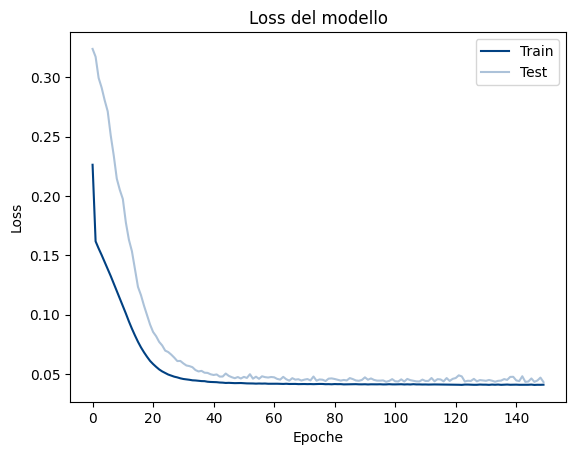

In [474]:
plt.plot(history.history['loss'], color='xkcd:darkish blue')
plt.plot(history.history['val_loss'],color='xkcd:cloudy blue')
plt.title('Loss del modello')
plt.ylabel('Loss')
plt.xlabel('Epoche')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


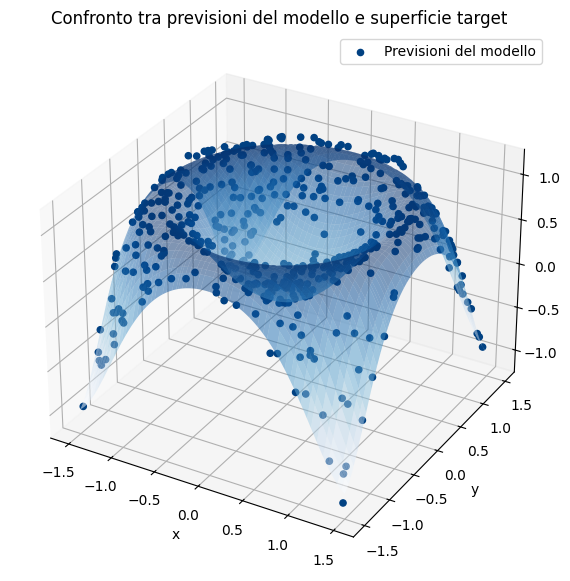

In [475]:
# Generazione dati predetti
x_predicted = np.random.uniform(-3/2, 3/2, 500)
y_predicted = np.random.uniform(-3/2, 3/2, 500)
xy_predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model.predict(xy_predicted)

x_grid, y_grid = np.meshgrid(x_valid, y_valid)
z_grid = np.sin(x_grid**2 + y_grid**2)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x_grid, y_grid, z_grid, cmap='Blues', alpha=0.5)

ax.scatter(x_predicted, y_predicted, z_predicted.flatten(), color='xkcd:darkish blue', label='Previsioni del modello', alpha=1)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Confronto tra previsioni del modello e superficie target')
ax.legend()

plt.show()


Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>